<a href="https://colab.research.google.com/github/km111104/Insurance-risk-model/blob/insurance-risk-model/insurance_risk_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This project simulates annual claim costs for a motor insurance company using Monte Carlo simulation. Each driver may have an accident (frequency), and each accident generates a claim (severity). The model estimates the average cost, variability, and worst-case outcomes.

In [ ]:
# Inputs
n_policies = 10000       # number of insured drivers
p_claim = 0.05           # probability of a claim per policy per year
mu = 8.5                 # lognormal mean (on log scale)
sigma = 0.4              # lognormal std dev (on log scale)
n_sims = 10000           # number of simulated years

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def simulate_frequency_binomial(n_policies, p_claim):
    """
    Each of n_policies has probability p_claim of making a claim.
    Returns the number of claims in a year.
    """
    return np.random.binomial(n=n_policies, p=p_claim)

In [ ]:
def simulate_severity_lognormal(n_claims, mu, sigma):
    """
    Claim sizes are lognormally distributed.
    mu, sigma are parameters of the underlying normal distribution.
    """
    if n_claims == 0:
        return np.array([])
    return np.random.lognormal(mean=mu, sigma=sigma, size=n_claims)

In [ ]:
for s in range(n_sims):
    # Simulate number of claims in a year
    n_claims = np.random.binomial(n=n_policies, p=p_claim)

In [ ]:
annual_totals = []
for s in range(n_sims):
  n_claims = np.random.binomial(n_policies, p_claim)
  if n_claims > 0:
    severities = simulate_severity_lognormal(n_claims, mu, sigma)
    total = severities.sum()
  else:
    total = 0.0
  annual_totals.append(total)

annual_totals = np.array(annual_totals)

In [ ]:
# Analysing the results using numpy
mean_cost = np.mean(annual_totals) # average annual claims
std_cost = np.std(annual_totals) # standard deviation (spread/volatility)
var95 = np.percentile(annual_totals, 95) # 95th percentile
var99 = np.percentile(annual_totals, 99) # 99th percentile

print("Mean annual cost:", mean_cost)
print("Standard deviation:", std_cost)
print("95th percentile (VaR 95):", var95)
print("99th percentile (VaR 99):", var99)

Mean annual cost: 2661833.7206101133
Standard deviation: 126337.43920461033
95th percentile (VaR 95): 2870406.8463351247
99th percentile (VaR 99): 2957425.4560176637


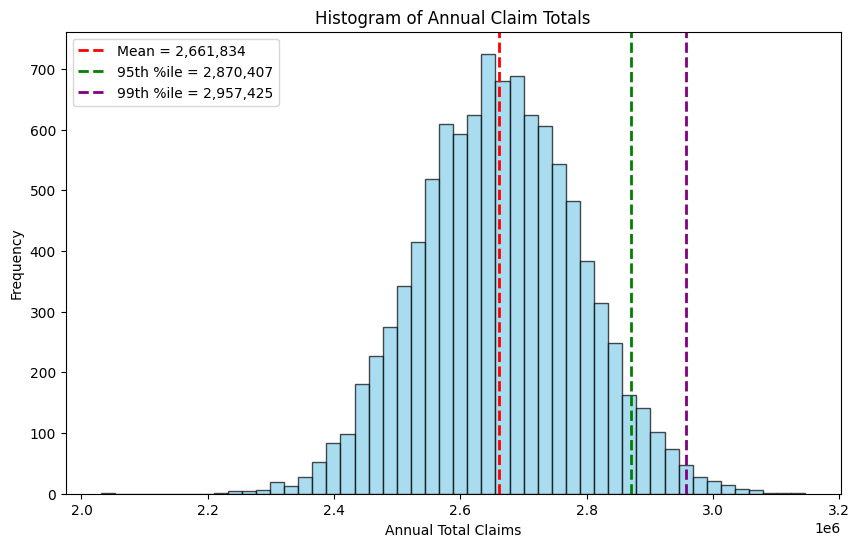

In [ ]:
# Histogram
mean_val = np.mean(annual_totals)
p95 = np.percentile(annual_totals, 95)
p99 = np.percentile(annual_totals, 99)

plt.figure(figsize=(10,6))
plt.hist(annual_totals, bins=50, alpha=0.7, color="skyblue", edgecolor="black")

# Vertical lines
plt.axvline(mean_val, color="red", linestyle="dashed", linewidth=2, label=f"Mean = {mean_val:,.0f}")
plt.axvline(p95, color="green", linestyle="dashed", linewidth=2, label=f"95th %ile = {p95:,.0f}")
plt.axvline(p99, color="purple", linestyle="dashed", linewidth=2, label=f"99th %ile = {p99:,.0f}")

plt.title("Histogram of Annual Claim Totals")
plt.xlabel("Annual Total Claims")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# Average annual claims are about £2,661,834
# In 1 out of 20 years (95th percentile), claims could be high as £2,870,407 (this represents a "bad year" that insurers should be prepared for)
# In 1 out of 200 years (99th percentile), claims could reach £2,957,425 (this is an extreme scenario that insurers must hold capital against to remain solvent)